In [1]:
# importing necessary libraries
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [6]:
from sklearn.neural_network import MLPClassifier

In [8]:
from sklearn.metrics import accuracy_score

In [10]:
data =pd.read_csv(r"C:\Users\hasin\Downloads\archive (2).zip")

In [85]:
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,23,0,18.0,17,3,3,0,1,0,1,0
1,24,1,21.0,25,4,3,0,0,1,0,0
2,25,1,19.0,4,0,3,0,1,1,1,0
3,26,0,22.0,33,5,3,1,1,0,0,0
4,27,1,23.0,37,6,3,0,0,0,0,0


In [86]:
data.tail()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
96,18,0,21.0,2,3,4,0,0,1,0,0
97,19,1,18.0,17,1,3,0,1,1,0,0
98,20,0,19.0,38,2,4,1,1,0,1,0
99,21,0,23.0,39,6,4,0,0,0,0,0
100,22,1,20.0,7,1,3,0,0,0,0,0


In [88]:
data.shape

(100, 11)

In [12]:
data

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [11]:
# preprocessing
#  remove any rows with missing values
data.dropna(inplace=True)

In [13]:
data.shape

(100, 11)

In [16]:
len(data)

100

In [17]:
data.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     100 non-null    object 
 1   Choose your gender                            100 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          100 non-null    object 
 4   Your current year of Study                    100 non-null    object 
 5   What is your CGPA?                            100 non-null    object 
 6   Marital status                                100 non-null    object 
 7   Do you have Depression?                       100 non-null    object 
 8   Do you have Anxiety?                          100 non-null    object 
 9   Do you have Panic attack?                     100 non-null    object 


In [21]:
# encoding categorical variables
label_encoders={}
for column in data.columns:
    if data[column].dtype=='object':
        label_encoders[column]=LabelEncoder()
        data[column]=label_encoders[column].fit_transform(data[column])

In [33]:
# splitting into features and target variable
x= data.drop(['Did you seek any specialist for a treatment?'],axis=1)
y= data['Did you seek any specialist for a treatment?']


In [34]:
for i, col in enumerate(data.columns):
    print(f"{i}: [{col}]")


0: [Timestamp]
1: [Choose your gender]
2: [Age]
3: [What is your course?]
4: [Your current year of Study]
5: [What is your CGPA?]
6: [Marital status]
7: [Do you have Depression?]
8: [Do you have Anxiety?]
9: [Do you have Panic attack?]
10: [Did you seek any specialist for a treatment?]


In [24]:
for col in data.columns:
    print(repr(col))


'Timestamp'
'Choose your gender'
'Age'
'What is your course?'
'Your current year of Study'
'What is your CGPA?'
'Marital status'
'Do you have Depression?'
'Do you have Anxiety?'
'Do you have Panic attack?'
'Did you seek any specialist for a treatment?'


In [25]:
data.columns


Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [30]:
X = data.drop(data.columns[8], axis=1)
y = data.iloc[:, 8]


In [35]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# standardizing features
scaler =StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


C:\Users\hasin\anaconda3_2025\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [40]:
# Define and train MLP model
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
model.fit(X_train, y_train)

,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,42


In [41]:
# PREDICTIONS 
y_pred= model.predict(X_test)

In [42]:
# calculate accuracy
accuracy= accuracy_score(y_test,y_pred)
print("Overall Accuracy:",accuracy)


Overall Accuracy: 0.85


In [43]:
# Displaying sample data
print("Sample Data:")
print(data.head())

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns

Sample Data:
   Timestamp  Choose your gender   Age  What is your course?  \
0         23                   0  18.0                    17   
1         24                   1  21.0                    25   
2         25                   1  19.0                     4   
3         26                   0  22.0                    33   
4         27                   1  23.0                    37   

   Your current year of Study  What is your CGPA?  Marital status  \
0                           3                   3               0   
1                           4                   3               0   
2                           0                   3               0   
3                           5                   3               1   
4                           6                   3               0   

   Do you have Depression?  Do you have Anxiety?  Do you have Panic attack?  \
0                        1                     0                          1   
1                        0   

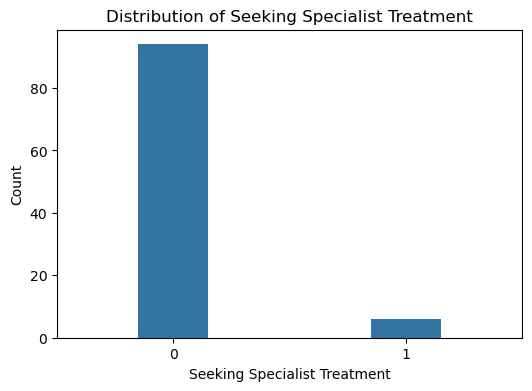

In [44]:
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Did you seek any specialist for a treatment?', data=data, width=0.3)
plt.title('Distribution of Seeking Specialist Treatment')
plt.xlabel('Seeking Specialist Treatment')
plt.ylabel('Count')
plt.show()

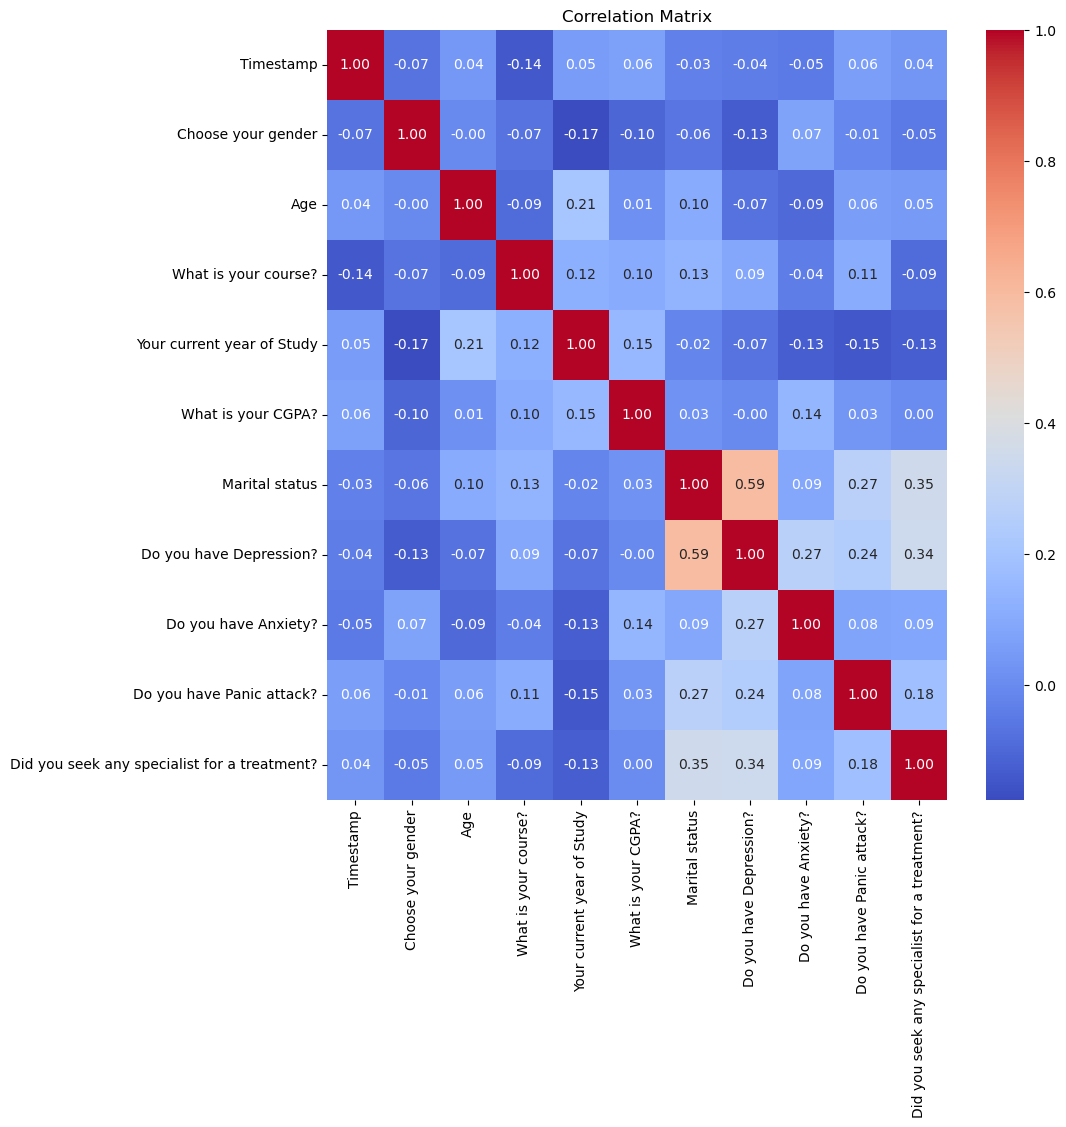

In [45]:
# Correlation matrix
corr = data.corr()
x=plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

plt.savefig('Correlation Matrix.pdf',bbox_inches='tight')
plt.show()

In [46]:
# Define and train MLP model
model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1, random_state=42)

In [47]:
# Lists to store loss and accuracy for each epoch
train_loss_history = []
train_accuracy_history = []
test_accuracy_history = []


In [48]:
# Train the model
epochs = 20  # You can adjust the number of epochs as needed
for epoch in range(epochs):
    model.partial_fit(X_train, y_train, classes=np.unique(y_train))
    

In [49]:
# Calculate loss
train_loss = model.loss_
train_loss_history.append(train_loss)
    

In [57]:
# calculate train accuracy
y_pred_train = model.predict(X_train)
train_accuracy=accuracy_score(y_train, y_pred_train)
train_accuracy_history.append(train_accuracy)

# calculating test accuracy
y_pred_test = model.predict(X_test)
train_accuracy=accuracy_score(y_train,y_pred_train)
train_accuracy_history.append(train_accuracy)

In [66]:
test_accuracy = 0.0


In [67]:
print(f"Epoch {epoch+1}/{epochs}--Train Loss: {train_loss:.4f}-Train Accuracy: {train_accuracy:.4f}-Test Accuracy:{test_accuracy:.4f}")

Epoch 20/20--Train Loss: 0.1095-Train Accuracy: 0.9625-Test Accuracy:0.0000


In [71]:
test_accuracy_history == []


True

In [76]:
train_loss_history = []
train_accuracy_history = []
test_accuracy_history = []


In [77]:
for epoch in range(epochs):
    ...
    train_loss_history.append(train_loss)
    train_accuracy_history.append(train_accuracy)
    test_accuracy_history.append(test_accuracy)


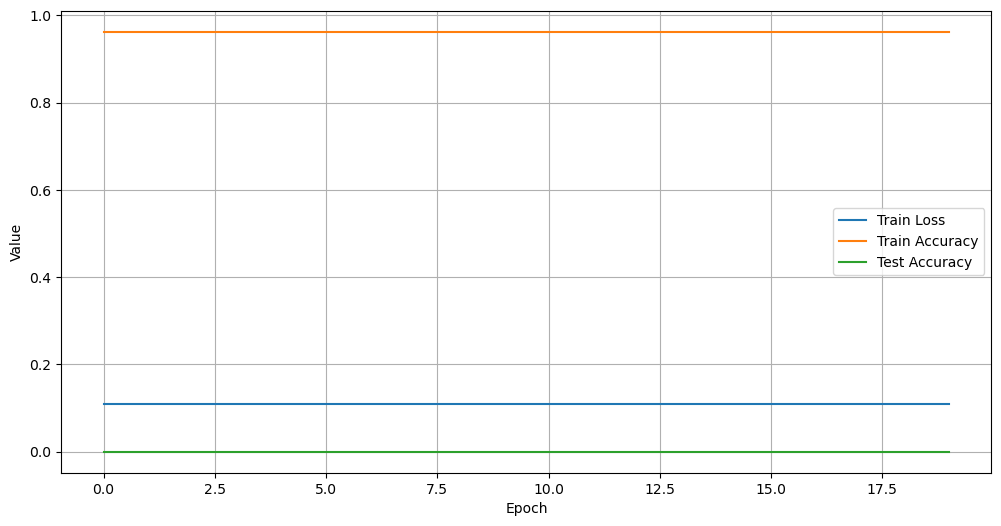

In [82]:
plt.figure(figsize=(12, 6))

plt.plot(train_loss_history, label='Train Loss')
plt.plot(train_accuracy_history, label='Train Accuracy')
plt.plot(test_accuracy_history, label='Test Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


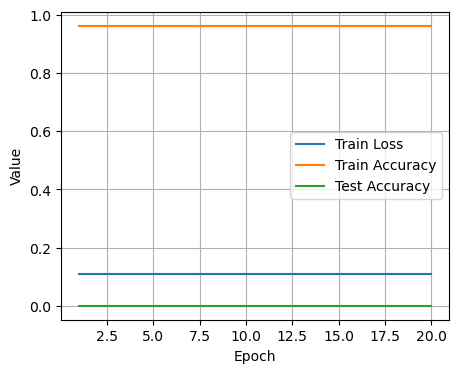

In [81]:
plt.figure(figsize=(5, 4))

plt.plot(range(1, epochs+1), train_loss_history, label='Train Loss')
plt.plot(range(1, epochs+1), train_accuracy_history, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracy_history, label='Test Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [83]:
# Calculate overall accuracy
y_pred_train = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

y_pred_test = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Overall Train Accuracy: {train_accuracy:.4f}")
print(f"Overall Test Accuracy: {test_accuracy:.4f}")

Overall Train Accuracy: 0.9625
Overall Test Accuracy: 0.8500
